<a href="https://colab.research.google.com/github/mmccleeseschool/Intro-to-machine-Learning/blob/main/McCleese_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of samples: 569
Number of features: 30
Number of classes: 2
Training data shape: (455, 30)
Test data shape: (114, 30)
Training labels shape: (455,)
Test labels shape: (114,)
Training accuracy: 0.9428571428571428
Test accuracy: 0.9385964912280702
              precision    recall  f1-score   support

   malignant       0.97      0.86      0.91        42
      benign       0.92      0.99      0.95        72

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



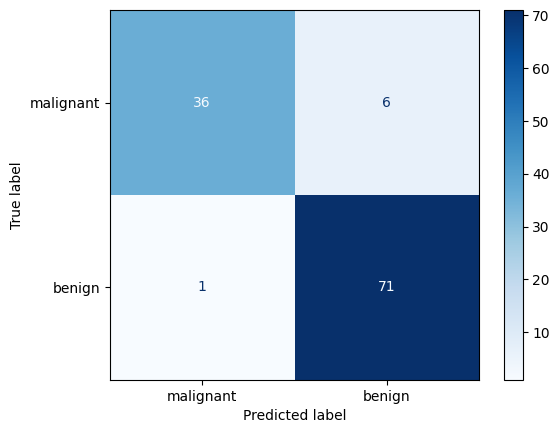

K-Fold Cross-Validation Accuracy Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean Accuracy: 0.9384711779448622
Standard Deviation: 0.02750305414538902

Model: GaussianNB
Accuracy Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean Accuracy: 0.9385
Standard Deviation: 0.0275

Model: KNeighborsClassifier
Accuracy Scores: [0.92982456 0.94736842 0.89473684 0.92982456 0.92982456 0.94736842
 0.89473684 0.94736842 0.94736842 0.91071429]
Mean Accuracy: 0.9279
Standard Deviation: 0.0201

Model: LogisticRegression
Accuracy Scores: [0.98245614 0.9122807  0.89473684 0.96491228 1.         0.94736842
 0.96491228 0.92982456 0.94736842 0.96428571]
Mean Accuracy: 0.9508
Standard Deviation: 0.0302

Model: SVC
Accuracy Scores: [0.96491228 0.89473684 0.85964912 0.94736842 0.9122807  0.92982456
 0.85964912 0.94736842 0.94736842 0.92857143]
Mean Accuracy: 0.9

In [40]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np


#loading the dataset
breast_cancer = load_breast_cancer()

#print(breast_cancer.DESCR)

#checking the samples and target sizes
n_samples, n_features = breast_cancer.data.shape
n_classes = len(breast_cancer.target_names)

print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')
print(f'Number of classes: {n_classes}')

#splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=11, stratify=breast_cancer.target)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

#creating and training the model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')

#classification report
report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)
print(report)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


#k-fold cross validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
X = breast_cancer.data
y = breast_cancer.target

scores = cross_val_score(model, X, y, cv=kfold)

print(f'K-Fold Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {np.mean(scores)}')
print(f'Standard Deviation: {np.std(scores)}')

#running multiple models to find the best one
estimators = {'GaussianNB': GaussianNB(),
              'KNeighborsClassifier': KNeighborsClassifier(),
              'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
              'SVC': SVC(gamma='scale')
              }

result = {}
for name, model in estimators.items():
  scores = cross_val_score(model, X, y, cv=kfold)
  result[name] =  {'scores' : scores,
                   'mean_accuracy' : np.mean(scores),
                   'std_deviation':np.std(scores)
                   }

for name, result in result.items():
  print(f"\nModel: {name}")
  print(f"Accuracy Scores: {result['scores']}")
  print(f"Mean Accuracy: {result['mean_accuracy']:.4f}")
  print(f"Standard Deviation: {result['std_deviation']:.4f}")
